In [1]:
import pandas as pd
import time, datetime
from jqdatasdk import *
#jqdata的账号密码
auth('13644220323', 'Hujinhe200102014')
df_data_5minute=pd.read_csv('gold_data.csv')


auth success 


In [2]:
df_data_5minute.drop('Unnamed: 0', axis=1, inplace=True)
df_data_5minute

,open,close,high,low,volume,money
0,226.70,226.65,226.85,226.45,5890.0,1.335146e+09
1,226.75,226.50,226.75,226.40,2562.0,5.804133e+08
2,226.45,226.45,226.60,226.40,1638.0,3.709666e+08
3,226.45,226.25,226.50,226.20,3162.0,7.157891e+08
4,226.25,226.25,226.30,226.20,1684.0,3.809907e+08
...,...,...,...,...,...,...
53305,277.80,277.80,277.85,277.75,606.0,1.683349e+08
53306,277.80,277.85,277.85,277.80,560.0,1.555840e+08
53307,277.85,277.85,277.90,277.80,802.0,2.228271e+08
53308,277.85,277.75,277.90,277.75,1236.0,3.433855e+08


In [3]:
df=df_data_5minute
close = df['close']
df.drop(labels=['close'], axis=1,inplace = True)
df.insert(0, 'close', close)
df

,close,open,high,low,volume,money
0,226.65,226.70,226.85,226.45,5890.0,1.335146e+09
1,226.50,226.75,226.75,226.40,2562.0,5.804133e+08
2,226.45,226.45,226.60,226.40,1638.0,3.709666e+08
3,226.25,226.45,226.50,226.20,3162.0,7.157891e+08
4,226.25,226.25,226.30,226.20,1684.0,3.809907e+08
...,...,...,...,...,...,...
53305,277.80,277.80,277.85,277.75,606.0,1.683349e+08
53306,277.85,277.80,277.85,277.80,560.0,1.555840e+08
53307,277.85,277.85,277.90,277.80,802.0,2.228271e+08
53308,277.75,277.85,277.90,277.75,1236.0,3.433855e+08


In [4]:
data_train =df.iloc[:int(df.shape[0] * 0.7), :]
data_test = df.iloc[int(df.shape[0] * 0.7):, :]
print(data_train.shape, data_test.shape)

(37317, 6) (15993, 6)


In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import time
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(data_train)

MinMaxScaler(feature_range=(-1, 1))

In [6]:
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)
data_train

array([[-0.98877193, -0.98736842, -0.98459384, -0.99297259, -0.82504604,
        -0.85978547],
       [-0.99298246, -0.98596491, -0.98739496, -0.99437807, -0.92389948,
        -0.93904608],
       [-0.99438596, -0.99438596, -0.99159664, -0.99437807, -0.95134557,
        -0.96104178],
       ...,
       [ 0.61263158,  0.61824561,  0.61484594,  0.61349262, -0.90916652,
        -0.90885626],
       [ 0.61684211,  0.61403509,  0.61204482,  0.61630358, -0.94754352,
        -0.94737162],
       [ 0.6154386 ,  0.6154386 ,  0.61064426,  0.61349262, -0.94445435,
        -0.9442865 ]])

In [7]:
from keras.layers import Input, Dense, LSTM
from keras.models import Model

from keras.layers import *
from keras.models import *
from keras.optimizers import Adam

output_dim = 1
batch_size = 256 #每轮训练模型时，样本的数量
epochs = 60 #训练60轮次
seq_len = 5
hidden_size = 128


TIME_STEPS = 5
INPUT_DIM = 6

lstm_units = 64
X_train = np.array([data_train[i : i + seq_len, :] for i in range(data_train.shape[0] - seq_len)])
y_train = np.array([data_train[i + seq_len, 0] for i in range(data_train.shape[0]- seq_len)])
X_test = np.array([data_test[i : i + seq_len, :] for i in range(data_test.shape[0]- seq_len)])
y_test = np.array([data_test[i + seq_len, 0] for i in range(data_test.shape[0] - seq_len)])

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(37312, 5, 6) (37312,) (15988, 5, 6) (15988,)


In [8]:
inputs = Input(shape=(TIME_STEPS, INPUT_DIM))
#drop1 = Dropout(0.3)(inputs)

x = Conv1D(filters = 64, kernel_size = 1, activation = 'relu')(inputs)  #, padding = 'same'
#x = Conv1D(filters=128, kernel_size=5, activation='relu')(output1)#embedded_sequences
x = MaxPooling1D(pool_size = 5)(x)
x = Dropout(0.2)(x)
print(x.shape)

(None, 1, 64)


In [9]:
lstm_out = Bidirectional(LSTM(lstm_units, activation='relu'), name='bilstm')(x)
#lstm_out = LSTM(lstm_units,activation='relu')(x)
print(lstm_out.shape)

(None, 128)


In [10]:
from keras import backend as K
import tensorflow.python.keras.engine
from tensorflow import keras
import numpy as np
from keras import initializers
# Attention GRU network  未用     
class AttLayer(Layer):
    def __init__(self, **kwargs):
        self.init = initializers.get('normal')
        #self.input_spec = [InputSpec(ndim=3)]
        super(AttLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape)==128
        #self.W = self.init((input_shape[-1],1))
        self.W = self.init((input_shape[-1],))
        #self.input_spec = [InputSpec(shape=input_shape)]
        self.trainable_weights = [self.W]
        super(AttLayer, self).build(input_shape)  # be sure you call this somewhere!

    def call(self, x, mask=None):
        eij = K.tanh(K.dot(x, self.W))
        
        ai = K.exp(eij)
        weights = ai/K.sum(ai, axis=1).dimshuffle(0,'x')
        
        weighted_input = x*weights.dimshuffle(0,1,'x')
        return weighted_input.sum(axis=1)

    def get_output_shape_for(self, input_shape):
        return (input_shape[0], input_shape[-1])

In [11]:
from keras.layers import * 
from keras import layers
# ATTENTION PART STARTS HERE
attention_probs = Dense(128, activation='sigmoid', name='attention_vec')(lstm_out)
#attention_mul=layers.merge([stm_out,attention_probs], output_shape],mode='concat',concat_axis=1))
attention_mul =Multiply()([lstm_out, attention_probs])
#attention_mul = merge([lstm_out, attention_probs],output_shape=32, name='attention_mul', mode='mul')

In [12]:
output = Dense(1, activation='sigmoid')(attention_mul)
#output = Dense(10, activation='sigmoid')(drop2)

model = Model(inputs=inputs, outputs=output)
print(model.summary())


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 5, 6)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 5, 64)     │        448 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 1, 64)     │          0 │ conv1d[0][0]      │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 1, 64)     │          0 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bilstm              │ (None, 128)       │     66,048 │ dropout[0][0]     │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_vec       │ (None, 128)       │     16,512 │ bilstm[0][0]      │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply (Multiply) │ (None, 128)       │          0 │ bilstm[0][0],     │
│                     │                   │            │ attention_vec[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 1)         │        129 │ multiply[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 83,137 (324.75 KB)

 Trainable params: 83,137 (324.75 KB)

 Non-trainable params: 0 (0.00 B)

None


Epoch 1/60
146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.5122
Epoch 2/60
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1876
Epoch 3/60
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1518
Epoch 4/60
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1516
Epoch 5/60
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1514
Epoch 6/60
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1511
Epoch 7/60
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1509
Epoch 8/60
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1507
Epoch 9/60
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1505
Epoch 10/60
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1504
Epoch 11/60
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1502
Epoch 12/60
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1501
Epoch 13/60
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1500
Epoch 14/60
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1500
Epoch 15/60
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

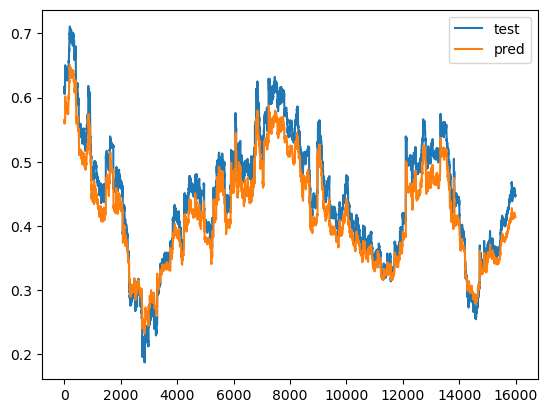

In [13]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, shuffle=False)
y_pred = model.predict(X_test)
print('MSE Train loss:', model.evaluate(X_train, y_train, batch_size=batch_size))
print('MSE Test loss:', model.evaluate(X_test, y_test, batch_size=batch_size))
plt.plot(y_test, label='test')
plt.plot(y_pred, label='pred')
plt.legend()
plt.show()